In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import otgmonitor as otg
#importlib.reload(otg)
import otgmonitor as otg
from astropy.table import Table
from Ska.Matplotlib import plot_cxctime
import Ska.engarchive.fetch as fetch

## Example

In [2]:
start = '2021:005:13:07:00.000'
stop = '2021:005:13:10:30.000'

In [3]:
msidset = ['4MP28AV', '4MP28BV', # MCE A/B: +28 VOLT MONITOR
           '4MP5AV', '4MP5BV', # MCE A/B: +5 VOLT MONITOR
           '4HENLAX', '4HENLBX', # MCE A/B: HETG ENABLE LOGIC STATUS MONITOR
           '4LENLAX', '4LENLBX', # MCE A/B: LETG ENABLE LOGIC STATUS MONITOR
           '4HEXRAX', '4HEXRBX', # MCE A/B: HETG EXECUTE RELAY STATUS MONITOR
           '4LEXRAX', '4LEXRBX', # MCE A/B: LETG EXECUTE RELAY STATUS MONITOR
           '4HPOSBRO', '4LPOSBRO']

In [4]:
dat = fetch.MSIDset(msidset, start=start, stop=stop)

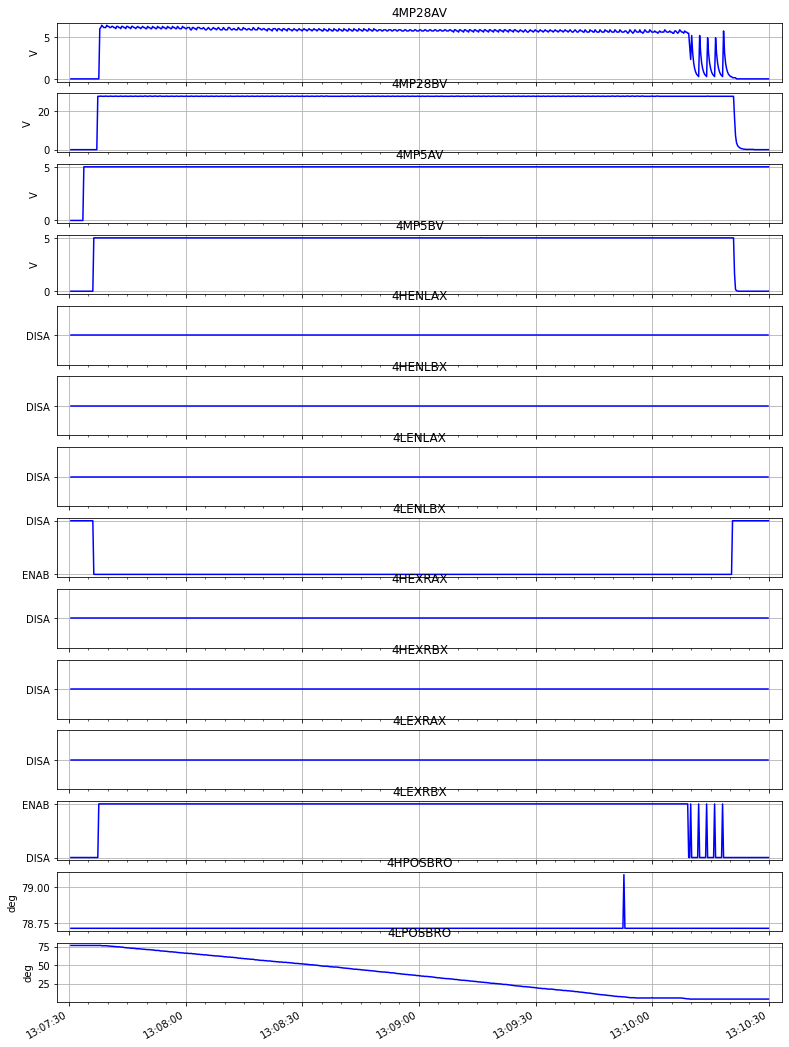

In [5]:
plt.figure(figsize=(13, 20))
for ii, msid in enumerate(msidset):
    plt.subplot(len(msidset), 1, ii + 1)
    dat[msidset[ii]].plot()
    #plt.ylim(3.5, 5.5)
    plt.grid()

## OTG Monitor

In [6]:
#start = '2002:002:00:00:00.000'
#stop = '2005:300:00:00:00.000'

In [7]:
start = '2021:001:00:00:00.000'
stop = '2021:200:00:00:00.000'

In [8]:
out = otg.otgmon(start, stop)

In [9]:
otgm = Table(out)

In [10]:
len(otgm)

626

In [11]:
moves_by_tstart = otgm.group_by('tstart')

In [12]:
len(moves_by_tstart.groups)

234

In [13]:
n_letg_insr = []
times = []
for grp in moves_by_tstart.groups:
    if grp['grating'][0] == 'LETG' and grp['direction'][0] == 'INSR':
        n_letg_insr.append(len(grp))
        times.append(grp['tstart'][0])

In [14]:
len(n_letg_insr)

71

In [15]:
n_letg_insr

[6,
 3,
 9,
 8,
 6,
 10,
 3,
 6,
 6,
 4,
 5,
 3,
 5,
 7,
 8,
 5,
 5,
 10,
 7,
 9,
 8,
 7,
 6,
 4,
 6,
 6,
 5,
 12,
 10,
 1,
 8,
 5,
 8,
 6,
 7,
 6,
 6,
 10,
 10,
 11,
 7,
 6,
 7,
 10,
 3,
 4,
 6,
 15,
 7,
 9,
 5,
 5,
 4,
 11,
 10,
 8,
 9,
 8,
 7,
 4,
 1,
 6,
 3,
 8,
 6,
 4,
 6,
 6,
 6,
 2,
 3]

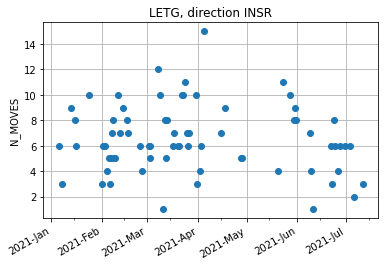

In [16]:
plot_cxctime(times, n_letg_insr, 'o')
plt.grid()
plt.ylabel('N_MOVES')
plt.title('LETG, direction INSR');